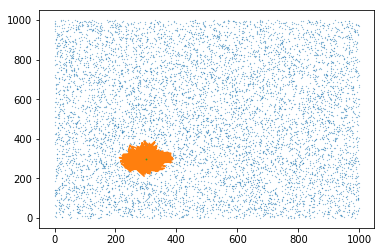

In [7]:
#libraries needed

import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from time import time

RADIUS_A = 90
HEIGTH = 1000
WIDTH = 1000


def GenerateRandomPoints(numberPoints,radius,centroids):
    "Function to generate samples points"
    d = dict(); 
    arrayOfPoints = []
    xCoordinates = []
    yCoordinates = []
    for i in range(numberPoints):
        angle = 2 * np.pi * np.random.random_sample()
        x = radius * np.random.random() * np.cos(angle)
        y =  radius * np.random.random() * np.sin(angle)
        coordinates = [x + centroids[0], y + centroids[1] ]
        xCoordinates.append(x + centroids[0])
        yCoordinates.append(y+ centroids[0])
        arrayOfPoints.append(coordinates)

        d['arrayOfPoints'] = arrayOfPoints
        d['x'] = xCoordinates
        d['y'] = yCoordinates
    
    return d


def GenerateRandomPointsInBox(numberPoints, heigth, width):
    "Functiom to generate samples box"
    d = dict(); 
    xCoordinates = []
    yCoordinates = []
    for i in range(numberPoints):
        x = np.random.randint(0, width) 
        y = np.random.randint(0, heigth)
        xCoordinates.append(x)
        yCoordinates.append(y)

        d['x'] = xCoordinates
        d['y'] = yCoordinates
    
    return d

#Box
box = GenerateRandomPointsInBox(8000, HEIGTH, WIDTH)

#Voids 1
centroids = [300,300]
c1 = GenerateRandomPoints(400, RADIUS_A, centroids)

plt.plot(box['x'], box['y'], linestyle='', marker='o', markersize=0.2) 
plt.plot(c1['x'], c1['y'], marker='o', markersize=0.1)
plt.plot(centroids[0], centroids[1], marker='o', markersize=0.8)
plt.show() 

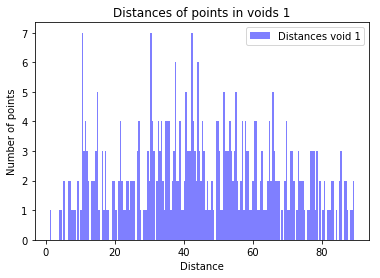

400


In [8]:
distanceVoids1=[]
for i in range (len(c1['x'])):
    distanceVoids1_i=np.sqrt((centroids[0]-c1['x'][i])**2+(centroids[1]-c1['y'][i])**2)
    distanceVoids1.append(distanceVoids1_i)
        
# We create the histogram for Voids1.
DD1h = plt.hist(distanceVoids1, bins=200,  facecolor='blue', label=r'Distances void 1', linewidth=0, alpha=0.5)[0]
plt.xlabel('Distance')
plt.ylabel('Number of points')
plt.legend(loc=1)
plt.title('Distances of points in voids 1')
plt.show()
print len(distanceVoids1)

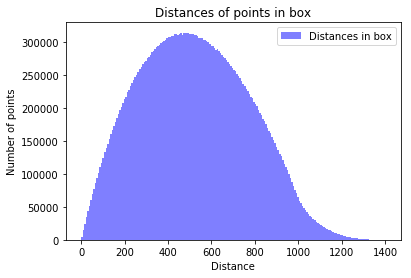

115.431999922


In [9]:
Ti=time()

d_box=[]
for i in range (len(box['x'])):
      for j in range(i+1,len(box['x'])):
        d_box_ij=np.sqrt((box['x'][i]-box['x'][j])**2+(box['y'][i]-box['y'][j])**2)
        d_box.append(d_box_ij)
        
# We create the histogram for random-data1.
RRh = plt.hist(d_box, bins=200,  facecolor='blue', label=r'Distances in box', linewidth=0, alpha=0.5)[0]
plt.xlabel('Distance')
plt.ylabel('Number of points')
plt.legend(loc=1)
plt.title('Distances of points in box')
plt.show()

Tf=time()
print Tf-Ti

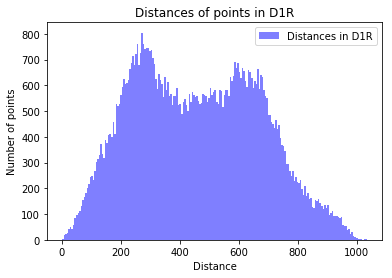

79800
1.34500002861


In [11]:
Ti=time()

distancesVoid1Box = []
for i in range (len(c1['x'])):
      for j in range(i+1,len(c1['x'])):
        distancesVoid1Box_i=np.sqrt((c1['x'][i]-box['x'][j])**2+(c1['y'][i]-box['y'][j])**2)
        distancesVoid1Box.append(distancesVoid1Box_i)
        
# We create the histogram for random-data1.
D1Rh = plt.hist(distancesVoid1Box, bins=200,  facecolor='blue', label=r'Distances in D1R', linewidth=0, alpha=0.5)[0]
plt.xlabel('Distance')
plt.ylabel('Number of points')
plt.legend(loc=1)
plt.title('Distances of points in D1R')
plt.show()
print len(distancesVoid1Box)

Tf=time()
print Tf-Ti

## Estimators

In [12]:
# Davis-Peebles:
DP1 = (DD1h/RRh)-1
# Landy-Szalay:
LS1 = (DD1h - 2*D1Rh + RRh)/RRh

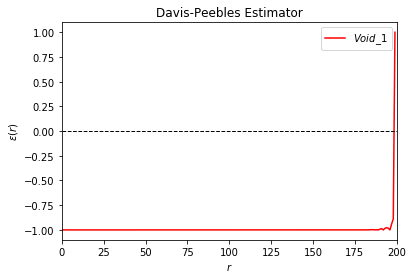

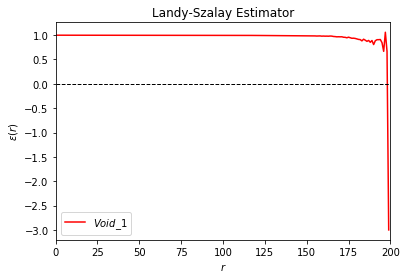

In [13]:
max_dist = 1000*np.sqrt(2)

plt.plot(DP1,color='r',label=r'$Void\_1$')
plt.axhline(y=0,linestyle='--',linewidth=1,color='k')
plt.title('Davis-Peebles Estimator')
plt.xlabel(r'$r$')
plt.ylabel(r'$\epsilon(r)$')
plt.xlim(0,200)
#plt.ylim(-0.99,-0.975)
plt.legend()
plt.show()

plt.plot(LS1,color='r',label=r'$Void\_1$')
plt.axhline(y=0,linestyle='--',linewidth=1,color='k')
plt.title('Landy-Szalay Estimator')
plt.xlabel(r'$r$')
plt.ylabel(r'$\epsilon(r)$')
plt.xlim(0,200)
#plt.ylim(0.94,1.05)
plt.legend()
plt.show()